<a href="https://colab.research.google.com/github/tubaifiem/Netflix-data-clustering/blob/main/Unsupervised_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
#Importing the  required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from numpy import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
!pip install nltk
import nltk 
!python3 -c "import nltk; nltk.download('all')"
# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

import pylab as pl
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

#stop-words

nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
netflix = pd.read_csv("/content/drive/MyDrive/Soumabha_Sarkar-Unsupervised_project/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
netflix.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [ ]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
netflix.shape

(7787, 12)

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Find the various statistic for all the columns
netflix.describe(include ='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [ ]:
netflix.isnull().sum()/netflix.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [ ]:
netflix["rating"].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [ ]:
netflix["cast"].value_counts()

David Attenborough                                                                                                                                                            18
Samuel West                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                    7
Kevin Hart                                                                                                                                                                     6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                                                         6
                                                                                                                   

In [ ]:
netflix["country"].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [ ]:
netflix['rating'].replace(np.nan, 'TV-MA',inplace  = True)
netflix['country'].replace(np.nan, 'United States',inplace  = True)
netflix['cast'].replace(np.nan, 'missing info',inplace  = True)

netflix= netflix.drop(columns= ['director'],axis=1)

In [ ]:
netflix = netflix[netflix['date_added'].notna()]

In [ ]:
# Checking the null values
netflix.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# New Features
# Add new features
netflix["date_added"] = pd.to_datetime(netflix['date_added'])
netflix['year_added'] = netflix['date_added'].dt.year
netflix['month_added'] = netflix['date_added'].dt.month

In [ ]:
netflix[["date_added","year_added","month_added"]].head()

,date_added,year_added,month_added
0,2020-08-14,2020,8
1,2016-12-23,2016,12
2,2018-12-20,2018,12
3,2017-11-16,2017,11
4,2020-01-01,2020,1


In [ ]:
# Check the Duplicates entries
len (netflix[netflix.duplicated()])

0

#EDA

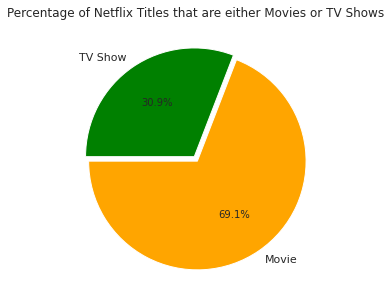

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix.type.value_counts(),explode=(0.025,0.025), labels=netflix.type.value_counts().index, colors=['orange','green'],autopct='%1.1f%%', startangle=180)
plt.show()

So there are about 4,000++ movies and almost 2,000 TV shows, with movies being the majority. There are far more movie titles (69,5%) that TV shows titles (31.5%) in terms of title.

Nearly 2/3rd of the content on netflix are movies while the rest are TV Show

In [ ]:
netflix_movies = netflix[netflix["type"]=="Movie"]

In [ ]:
netflix_shows = netflix[netflix["type"]=="TV Show"]

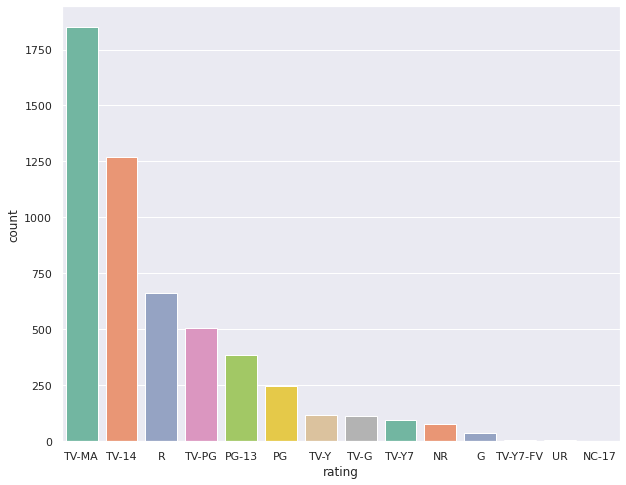

In [ ]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

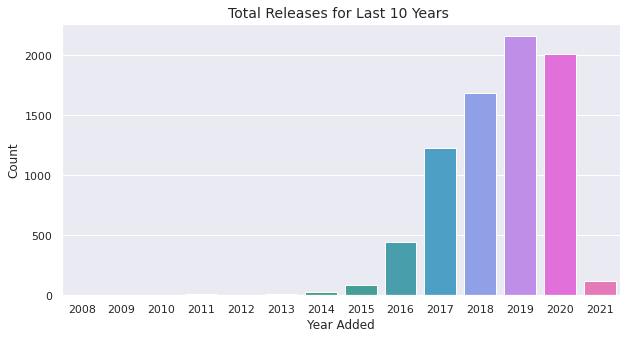

In [ ]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='year_added',data=netflix,palette = "husl")

plt.title('Total Releases for Last 10 Years ',fontsize = 14)  
plt.xlabel('Year Added', fontsize = 12) 
plt.ylabel('Count', fontsize = 12)   
plt.show()

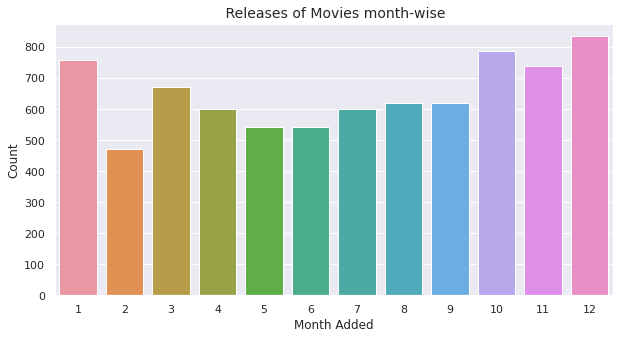

In [ ]:
# Release of movies month-wise
sns.color_palette("cubehelix", as_cmap=True)
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='month_added',data=netflix)


plt.title(' Releases of Movies month-wise',fontsize = 14)  
plt.xlabel('Month Added', fontsize = 12) 
plt.ylabel('Count', fontsize = 12)    
plt.show()

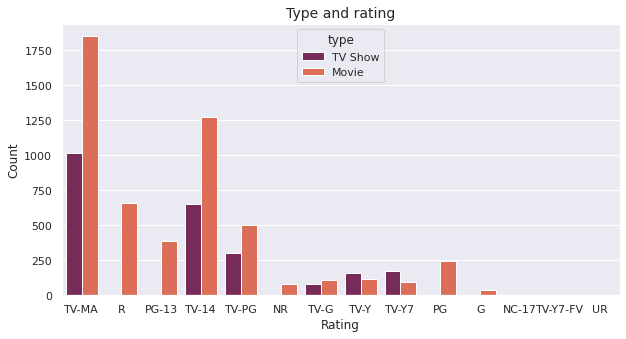

In [ ]:
# Rating
plt.figure(figsize=(10,5))
sns.countplot(x='rating',hue='type',data=netflix,palette="rocket")
plt.title('Type and rating',fontsize = 14)
plt.xlabel('Rating', fontsize = 12) 
plt.ylabel('Count', fontsize = 12)  
plt.show()

In [ ]:
country = netflix['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]


fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Reds)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'orange', width = 2)))
fig.show()

Yearwise analysis

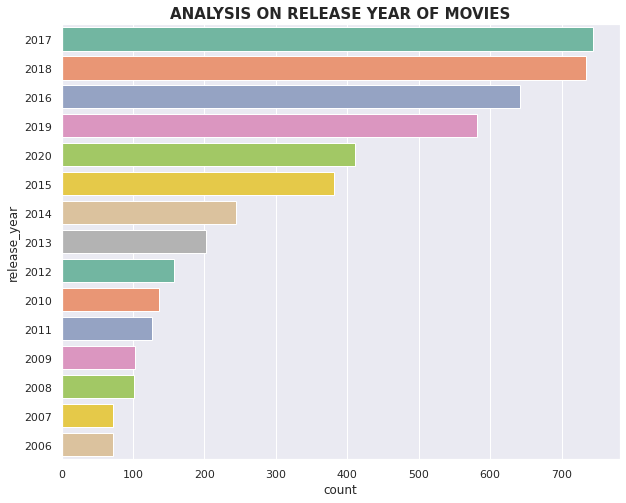

In [ ]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

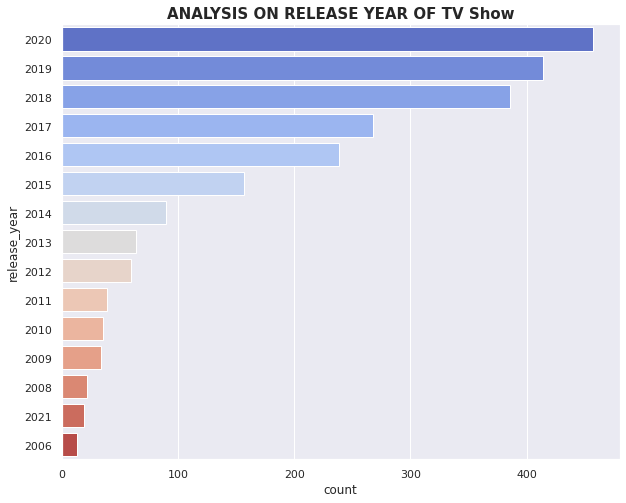

In [ ]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_shows, palette="coolwarm", order=netflix_shows['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

Most of the TV Shows were released in 2020 followed by 2019 and 2018

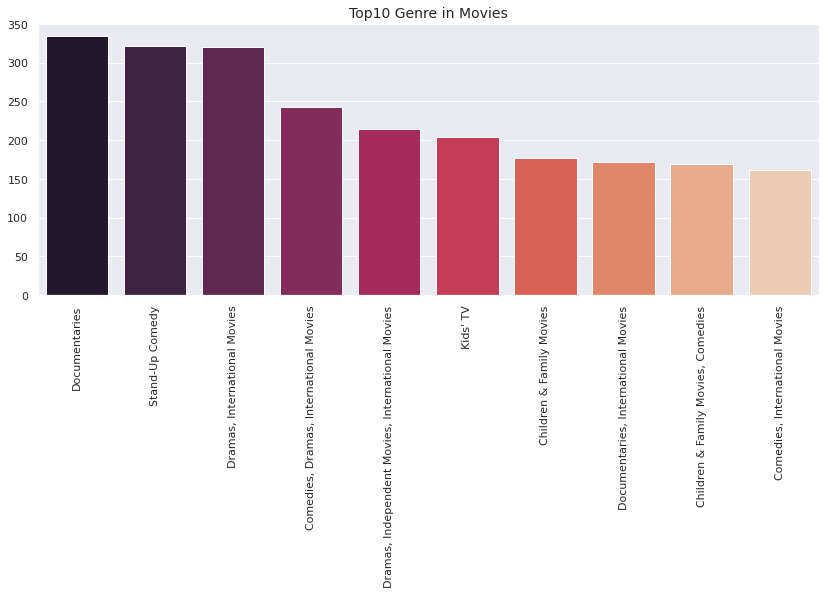

In [ ]:
# Top 10 Genre in movies
plt.figure(figsize=(14,5))
sns.barplot(x = netflix["listed_in"].value_counts().head(10).index,
            y = netflix["listed_in"].value_counts().head(10).values,palette="rocket")
plt.xticks(rotation=90)
plt.title("Top10 Genre in Movies",fontsize = 14)
plt.show()

In [ ]:
netflix_movies["duration"].head()

1     93 min
2     78 min
3     80 min
4    123 min
6     95 min
Name: duration, dtype: object

In [ ]:
netflix_shows['duration']=netflix_shows['duration'].str.replace('Season','')
netflix_shows['duration']=netflix_shows['duration'].str.replace('s','')
netflix_movies['duration']=netflix_movies["duration"].str.replace('min','')

netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_shows['duration']=netflix_shows['duration'].astype(str).astype(int)
#netflix['duration']

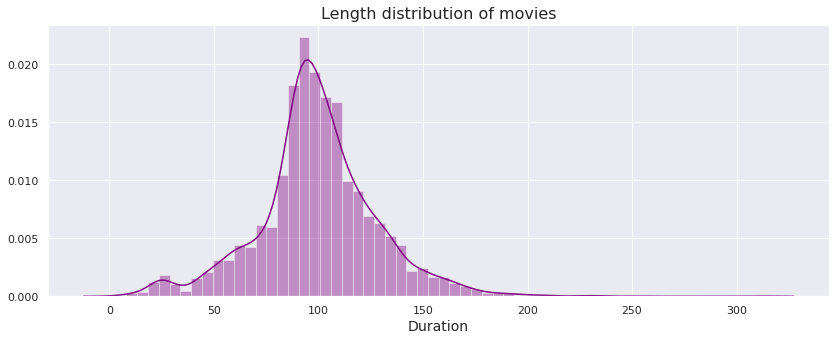

In [ ]:
# Length distribution of movies
#movie_data = netflix[netflix['type']=='Movie']

plt.figure(figsize=(14, 5))

sns.distplot(netflix_movies['duration'], bins=60,color='purple').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16)
plt.xlabel('Duration', fontsize=14)
plt.show()

In [ ]:
shows=netflix_shows['duration'].value_counts().T.reset_index()


fig = px.pie(shows,values='duration',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title="season-wise distribution of tv shows")
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict( line=dict(color='#7851a9', width=2)))

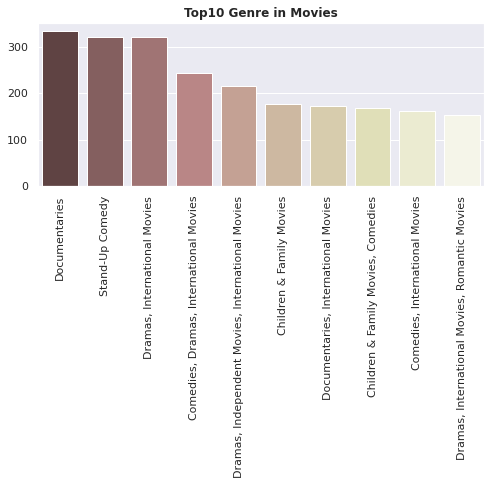

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(x = netflix_movies["listed_in"].value_counts().head(10).index,
            y = netflix_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=90)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

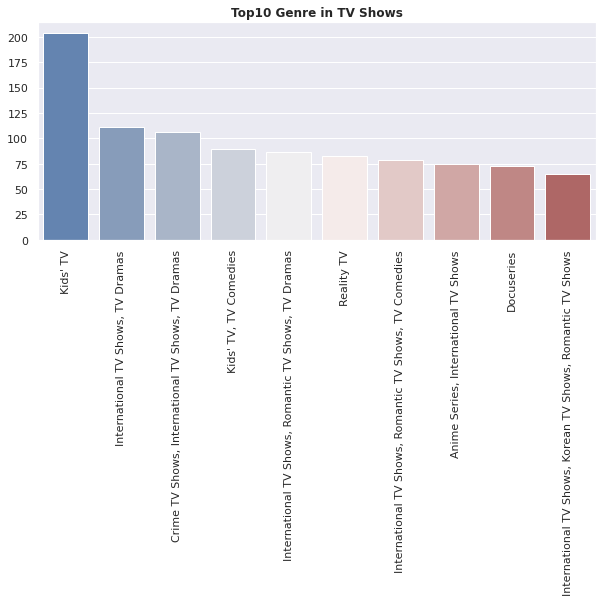

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x = netflix_shows["listed_in"].value_counts().head(10).index,
            y = netflix_shows["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=90)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

LONGEST TV - SHOWS

In [ ]:
long_shows = netflix_shows[netflix_shows['duration']>9]
long_shows_data = long_shows[['title','duration']]
long_shows_data.sort_values(by=['duration'],ascending=False)

,title,duration
2538,Grey's Anatomy,16
4438,NCIS,15
5912,Supernatural,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
1300,Cheers,11
2678,Heartland,11
1577,Dad's Army,10
1597,Danger Mouse: Classic Collection,10


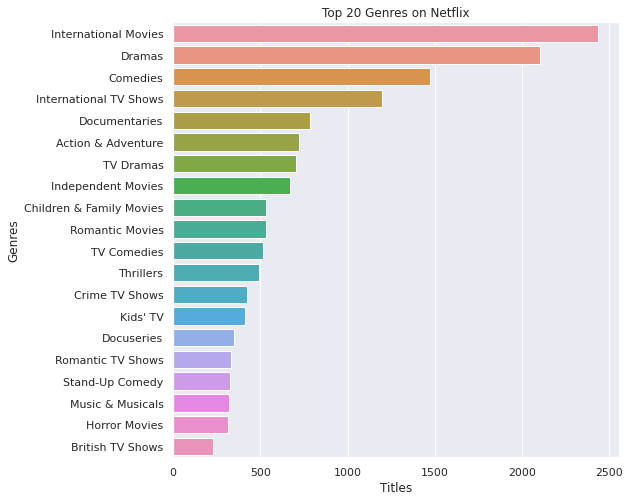

In [ ]:
filtered_genres = netflix.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(8,8))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

**Top Actor on Netflix based on the number of titles**

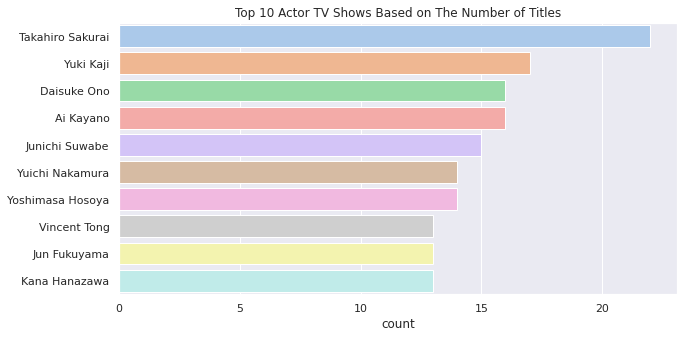

In [ ]:
filtered_cast_shows = netflix_shows[netflix_shows.cast != 'missing info'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(10,5))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

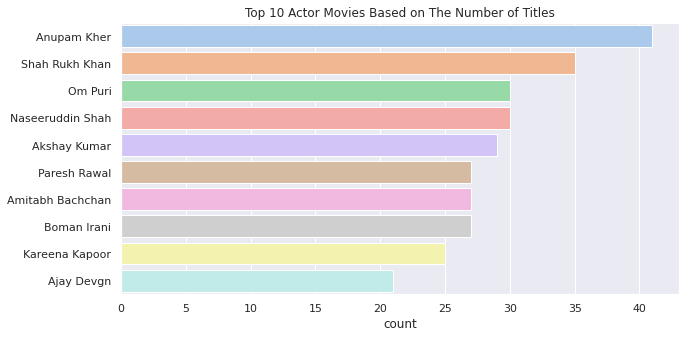

In [ ]:
filtered_cast_movie = netflix_movies[netflix_movies.cast != 'missing info'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(10,5))
plt.title('Top 10 Actor Movies Based on The Number of Titles')
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette='pastel')
plt.show()

In [ ]:
netflix.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [ ]:
netflix_movies.drop(columns=['show_id', 'title', 'cast', 'date_added',
          'description'],axis=1,inplace=True)

netflix_shows.drop(columns=['show_id', 'title', 'cast', 'date_added',
          'description'],axis=1,inplace=True)

new_netflix = netflix.drop(columns=['show_id', 'title', 'cast', 'date_added',
          'description'],axis=1)
netflix_movies

,type,country,release_year,rating,duration,listed_in,year_added,month_added
1,Movie,Mexico,2016,TV-MA,93,"Dramas, International Movies",2016,12
2,Movie,Singapore,2011,R,78,"Horror Movies, International Movies",2018,12
3,Movie,United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017,11
4,Movie,United States,2008,PG-13,123,Dramas,2020,1
6,Movie,Egypt,2019,TV-MA,95,"Horror Movies, International Movies",2020,6
...,...,...,...,...,...,...,...,...
7781,Movie,United States,2006,PG,88,"Children & Family Movies, Comedies",2020,1
7782,Movie,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99,"Dramas, International Movies",2020,10
7783,Movie,India,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",2019,3
7784,Movie,United States,2019,TV-MA,44,"Documentaries, International Movies, Music & M...",2020,9


In [ ]:
new_netflix.head()

,type,country,release_year,rating,duration,listed_in,year_added,month_added
0,TV Show,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,8
1,Movie,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",2016,12
2,Movie,Singapore,2011,R,78 min,"Horror Movies, International Movies",2018,12
3,Movie,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017,11
4,Movie,United States,2008,PG-13,123 min,Dramas,2020,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_netflix["type"] = le.fit_transform(new_netflix["type"])
new_netflix["country"] = le.fit_transform(new_netflix["country"])

new_netflix['rating'] = le.fit_transform(new_netflix['rating'])
new_netflix['listed_in'] = le.fit_transform(new_netflix['listed_in'])

In [ ]:
new_netflix["duration"] = new_netflix["duration"].str.replace("Season"," ")
new_netflix["duration"] = new_netflix["duration"].str.replace("s"," ")
new_netflix["duration"] = new_netflix["duration"].str.replace("min"," ")

In [ ]:
new_netflix["duration"] = new_netflix["duration"].astype(str).astype(int)

In [ ]:
netflix["duration"] = netflix["duration"].str.replace("Season"," ")
netflix["duration"] = netflix["duration"].str.replace("s"," ")
netflix["duration"] = netflix["duration"].str.replace("min"," ")

In [ ]:
netflix["duration"] = netflix["duration"].astype(str).astype(int)

In [ ]:
# transform the data using StandardScaler
Flix_df_standarized = pd.DataFrame(StandardScaler().fit_transform(new_netflix),columns = new_netflix.columns)

#Perform a PCA to visualize clusters
pca = PCA(n_components = 2)
Flix_df_pca=pd.DataFrame(pca.fit_transform(Flix_df_standarized))

In [ ]:
Flix_df_standarized.head()

,type,country,release_year,rating,duration,listed_in,year_added,month_added
0,1.496802,-2.041651,0.692231,0.492155,-1.280313,1.084506,1.085420,0.338631
1,-0.668091,-0.505346,0.235617,0.492155,0.467228,0.381066,-1.796311,1.452410
2,-0.668091,-0.099853,-0.335151,-1.052434,0.172698,0.588901,-0.355446,1.452410
3,-0.668091,0.871046,-0.563458,-1.567297,0.211969,-1.713266,-1.075878,1.173965
4,-0.668091,0.871046,-0.677611,-1.567297,1.056286,0.253168,1.085420,-1.610483


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc = scaler.fit_transform(new_netflix)
netflix_df = pd.DataFrame(sc, columns=list(new_netflix.columns))
X = netflix_df
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(netflix_df).score(netflix_df) for i in range(len(kmeans))]

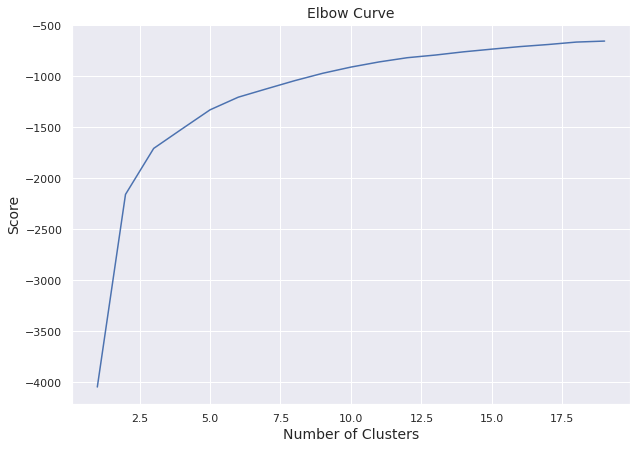

In [ ]:
pl.figure(figsize=(10,7))
pl.plot(Nc,score)
pl.xlabel('Number of Clusters', fontsize = 14)
pl.ylabel('Score', fontsize = 14)
pl.title('Elbow Curve',fontsize = 14)
pl.show()

In [ ]:
#fitting
kmeans = KMeans(n_clusters=5)
kmeans.fit(netflix_df)

KMeans(n_clusters=5)

In [ ]:
len(kmeans.labels_)

netflix['cluster'] = kmeans.labels_
netflix.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,3
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,0
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,0
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1,2


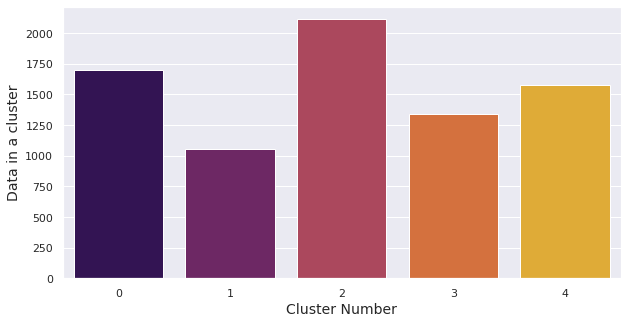

In [ ]:
plt.figure(figsize=(10,5))
axis = sns.barplot(x=np.arange(0,5,1),palette="inferno",y=netflix.groupby(['cluster']).count()['type'].values)
x=axis.set_xlabel("Cluster Number", fontsize =14)
x=axis.set_ylabel("Data in a cluster", fontsize =14)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(netflix_df)

print(len(kmeans.labels_))
netflix['cluster'] = kmeans.labels_
netflix.head()

7777


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,3
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,2
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1,4


In [ ]:
netflix.groupby(['cluster']).mean()

,release_year,duration,year_added,month_added
cluster,,,,
0,2016.283822,1.774834,2018.681173,3.456008
1,2013.032185,91.358554,2018.311124,9.418972
2,2012.424640,109.014417,2018.419397,8.838139
3,2016.155622,1.749814,2018.399851,9.688757
4,2013.187981,98.955288,2018.667788,2.848558


In [ ]:
size_array = list(netflix.groupby(['cluster']).count()['duration'].values)
size_array

[1057, 1771, 1526, 1343, 2080]

In [ ]:
netflix[netflix['cluster']==size_array.index(sorted(size_array)[0])].sample(5)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,cluster
788,s789,TV Show,Beating Again,"Kyung-ho Jung, So-yeon Kim, Hyun-min Yoon, Goo...",South Korea,2017-05-22,2015,TV-14,1,"International TV Shows, Korean TV Shows, Roman...",After enduring both business and family upheav...,2017,5,0
5164,s5165,TV Show,Republic of Doyle,"Allan Hawco, Krystin Pellerin, Marthe Bernard,...",Canada,2020-05-28,2014,TV-14,6,"Crime TV Shows, TV Comedies, TV Dramas",A pair of father and son private investigators...,2020,5,0
3867,s3868,TV Show,Mahi Way,"Pushtii Shakti, Viraf Patel, Siddhant Karnick,...",India,2018-03-01,2010,TV-14,1,"International TV Shows, TV Comedies",Though worried she's doomed to be single forev...,2018,3,0
4866,s4867,TV Show,Pioneers of African-American Cinema,missing info,United States,2017-02-01,1946,TV-14,1,TV Shows,This newly preserved collection features more ...,2017,2,0
6322,s6323,TV Show,The Eddy,"André Holland, Joanna Kulig, Amandla Stenberg,...","United Kingdom, Germany, United States, France",2020-05-08,2020,TV-MA,1,"International TV Shows, TV Dramas",The owner of a Paris jazz club gets tangled up...,2020,5,0


In [ ]:
netflix[netflix['cluster']==size_array.index(sorted(size_array)[-1])].sample(5)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,cluster
4619,s4620,Movie,Onaatah,"Sweety Pala, Merlvin Mukhim, Richard Kharpuri,...",India,2018-05-01,2016,TV-14,107,"Dramas, International Movies","Seeking to heal after a traumatic assault, a y...",2018,5,4
3096,s3097,Movie,Jack and the Cuckoo-Clock Heart,"Orlando Seale, Samantha Barks, Harry Sadeghi, ...","France, Belgium",2017-02-08,2013,PG,93,"Children & Family Movies, Music & Musicals",Equipped with a mechanical heart and determine...,2017,2,4
2355,s2356,Movie,Garfield Gets Real,"Frank Welker, Wally Wingert, Gregg Berger, Jen...",United States,2020-01-01,2007,TV-Y,78,"Children & Family Movies, Comedies","After trying to live in the ""real world"" and c...",2020,1,4
623,s624,Movie,Auschwitz: Blueprints of Genocide,Roy Marsden,United Kingdom,2019-01-19,1994,TV-PG,49,Documentaries,Newly released KGB files expose evidence provi...,2019,1,4
1667,s1668,Movie,Dear Zindagi,"Alia Bhatt, Shah Rukh Khan, Ira Dubey, Yashasw...",India,2017-04-25,2016,TV-14,149,"Comedies, Dramas, International Movies",A young cinematographer with a bright professi...,2017,4,4


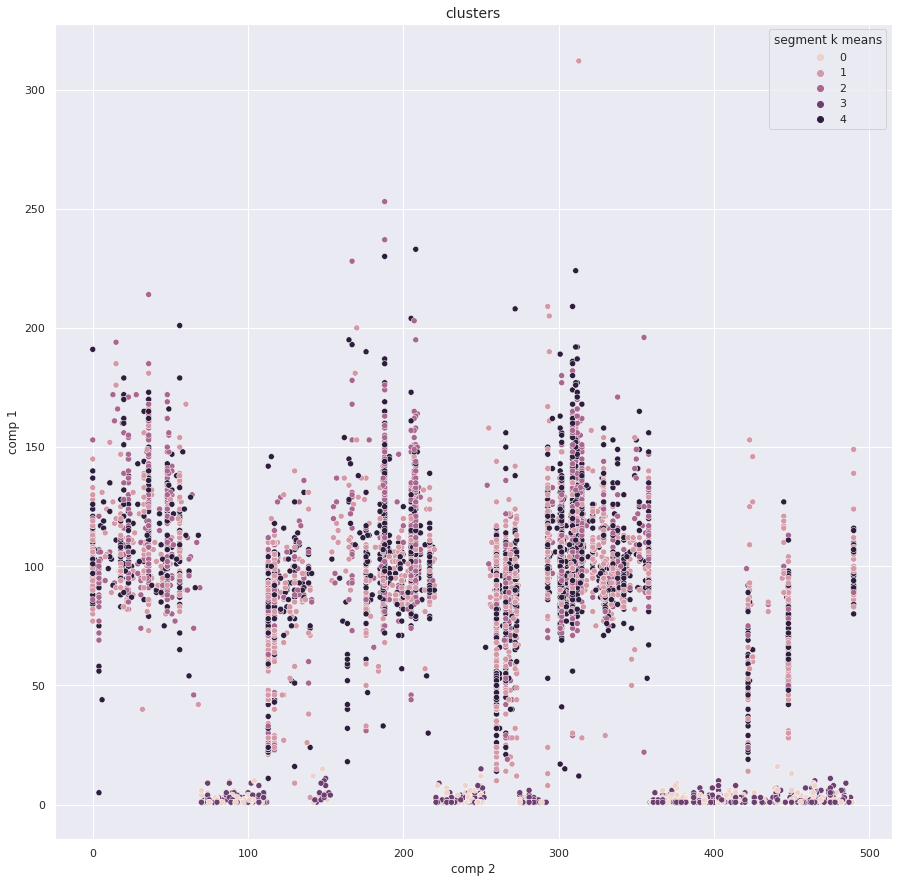

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             7777 non-null   int64  
 1   country          7777 non-null   int64  
 2   release_year     7777 non-null   int64  
 3   rating           7777 non-null   int64  
 4   comp 1           7777 non-null   int64  
 5   comp 2           7777 non-null   int64  
 6   comp 3           7777 non-null   int64  
 7   comp 4           7777 non-null   int64  
 8   comp 5           19 non-null     float64
 9   segment k means  7777 non-null   int32  
dtypes: float64(1), int32(1), int64(8)
memory usage: 638.0 KB


In [ ]:
netflix = pd.concat([new_netflix,pd.DataFrame(score)],axis=1)
netflix.columns.values[-5:]=['comp 1','comp 2','comp 3','comp 4','comp 5']
netflix['segment k means'] = kmeans.labels_

#data = data.set_index(data['show_id'])
#f_mm.head()

x_axis = netflix['comp 2']
y_axis = netflix['comp 1']
plt.figure(figsize=(15,15))
sns.scatterplot(x_axis,y_axis,hue=netflix['segment k means'])
plt.title('clusters', fontsize = 14)
plt.show()


netflix.info()

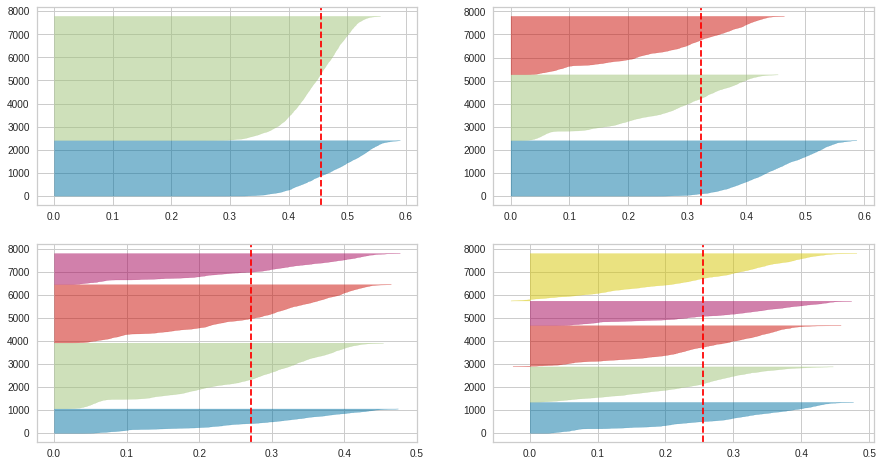

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

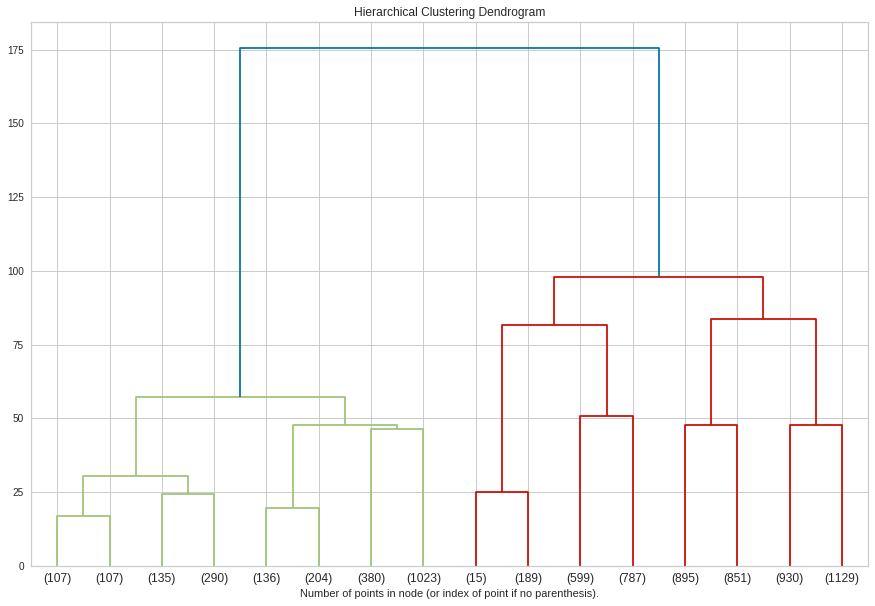

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


#iris = load_iris()
X = Flix_df_standarized

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(15,10))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
# lets start with programimg
def silhouette_analysis(X, X_pca, range_n_clusters):
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 10)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = AgglomerativeClustering(n_clusters = n_clusters,
                                   affinity = 'euclidean',
                                   linkage = 'ward')
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print('For n_clusters =', n_clusters,
              'The average silhouette_score is :', silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 15
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.5, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10
        ax1.set_title('The silhouette plot for the various clusters.')
        ax1.set_xlabel('The silhouette coefficient values')
        ax1.set_ylabel('Clusters')

        ax1.axvline(x=silhouette_avg, color = 'cyan', linestyle= '--')

        ax1.set_yticks([])  
        ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title('The visualization of the clustered data.')
        ax2.set_xlabel('PCA component 1')
        ax2.set_ylabel('PCA component 2')

        plt.suptitle(('\nSilhouette analysis for Agglomerative clustering '
                      'with n_clusters = %d' % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 4 The average silhouette_score is : 0.17296314851287742


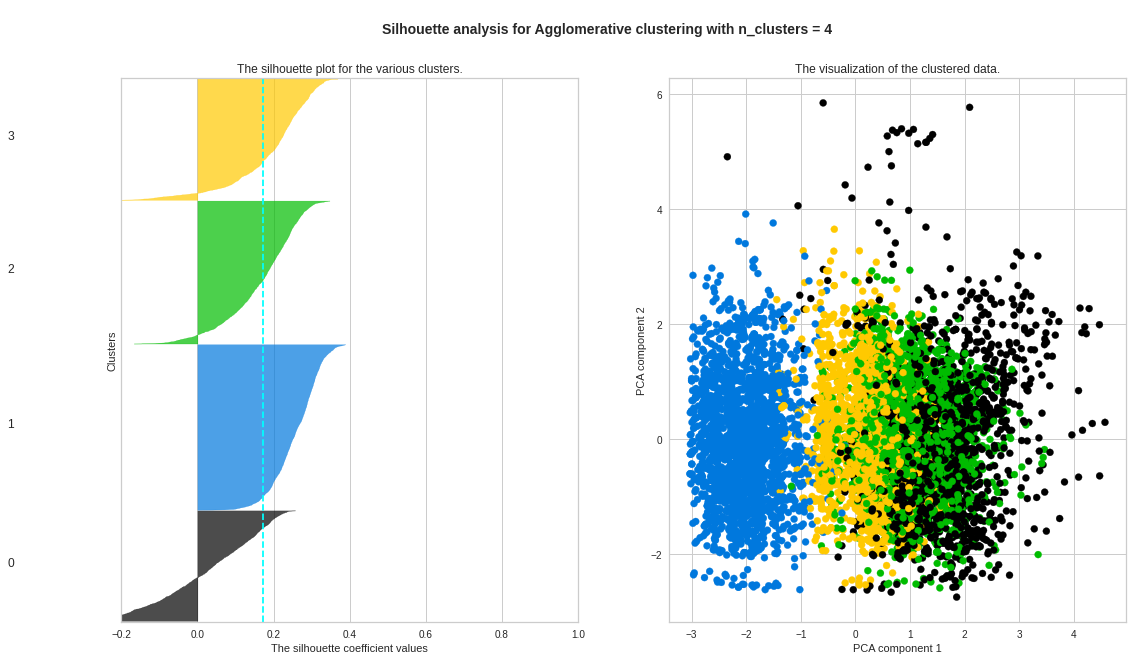

In [ ]:
silhouette_analysis(np.array(Flix_df_standarized),Flix_df_pca,[4])